In [13]:
from scipy.integrate import odeint
import numpy as np
from matplotlib import pyplot as plt

In [48]:
## Establish constants
lam = 2.7778E-05
v_pts = 0.1656
vm_pgi = 0.8751
keq_pgi = 0.3
km_pgi_g6p = 0.28
km_pgi_f6p = 0.147
vm_zwf = 0.0853
km_zwf_g6p = 0.1
vm_pfk = 2.615
km_pfk_f6p = 0.16
n_pfk = 3
vm_ino1 = 0.2616
km_ino1_g6p = 1.18
vm_t_mi = 0.045
km_t_mi = 15
vm_miox = 0.2201
km_miox_mi = 24.7
a_miox = 5.4222
ka_miox_mi = 20

In [59]:
def michaelismenten(x, vm, km):
    return (vm*x)/(km+x)

def reversible_michaelismenten(x, y, vm, keq, kmx, kmy):
    return (vm*(x - (y/keq)))/(x + kmx*(1+(y/kmy)))

def hilleqn(x, vm, n, km):
    return (vm*x**n)/(km**n + x**n)

def michaelismenten_substrateactivation(x, vm, km, a, ka):
    vm_eff = vm * (1+ (a*x)/(ka + x))
    return (vm_eff*x)/(km  + x)

In [60]:
def u(control, x, n, theta, k):
    if control == 'a':
        return (k*x**n)/(theta**n + x**n)
    elif control == 'r':
        return (k*theta**n)/(theta**n + x**n)
    else: return k

In [70]:
def glucaric_acid(x, t):
    n_ino1 = 2.; n_miox = 2
    theta_ino1 = 8.46E-01; theta_miox = 0.1
    k_ino1 = 1.00E-07; k_miox = 1.00E-07
    
    g6p, f6p, mi, ino1, miox = x

    v_pgi = reversible_michaelismenten(g6p, f6p, vm_pgi, keq_pgi, km_pgi_g6p, km_pgi_f6p)
    v_zwf = michaelismenten(g6p, vm_zwf, km_zwf_g6p)
    v_pfk = hilleqn(f6p, vm_pfk, n_pfk, km_pfk_f6p)
    v_ino1 = ino1 * michaelismenten(g6p, vm_ino1, km_ino1_g6p)
    v_tm = michaelismenten(mi, vm_t_mi, km_t_mi)
    v_miox = miox * michaelismenten_substrateactivation(mi, vm_miox, km_miox_mi, a_miox, ka_miox_mi)

    dg6pdt = v_pts - v_zwf - v_pgi - lam*g6p
    df6pdt = v_pgi + 0.5*v_zwf - v_pfk - lam*f6p
    dmidt = v_ino1 - v_tm - v_miox - lam*mi
    dino1dt = u('r', mi, n_ino1, theta_ino1, k_ino1)  - lam*ino1
    dmioxdt = u('a', mi, n_miox, theta_miox, k_miox) - lam*miox
    return [dg6pdt, df6pdt, dmidt, dino1dt, dmioxdt]

Text(0, 0.5, 'Concentrations')

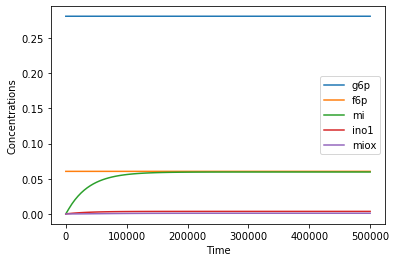

In [72]:
t = np.linspace(0, 5E5, 100) 
y0 = np.array([0.281, 0.0605, 0., 0., 0.]) #g6p, f6p, mi, ino1, miox

sol = odeint(glucaric_acid, y0, t)

plt.plot(t, sol[:, 0], label='g6p')
plt.plot(t, sol[:, 1], label='f6p')
plt.plot(t, sol[:, 2], label='mi')
plt.plot(t, sol[:, 3], label='ino1')
plt.plot(t, sol[:, 4], label='miox')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Concentrations')


Text(0, 0.5, 'Concentrations')

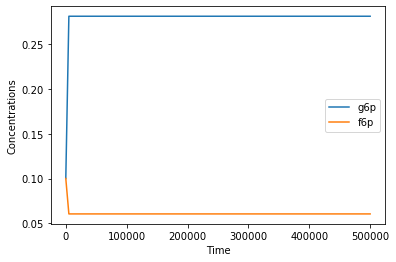

In [54]:
def main_pathway(x, t):
    g6p, f6p = x

    v_pgi = reversible_michaelismenten(g6p, f6p, vm_pgi, keq_pgi, km_pgi_g6p, km_pgi_f6p)
    v_zwf = michaelismenten(g6p, vm_zwf, km_zwf_g6p)
    v_pfk = hilleqn(f6p, vm_pfk, n_pfk, km_pfk_f6p)

    dg6pdt = v_pts - v_zwf - v_pgi - lam*g6p
    df6pdt = v_pgi + 0.5*v_zwf - v_pfk - lam*f6p
    return [dg6pdt, df6pdt]

t = np.linspace(0, 5E5, 100) 
y0 = np.array([0.1, 0.1]) #g6p, f6p, mi, ino1, miox

sol = odeint(main_pathway, y0, t)

plt.plot(t, sol[:, 0], label='g6p')
plt.plot(t, sol[:, 1], label='f6p')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Concentrations')


In [56]:
sol[-1, 1]

0.06050138861630573

In [ ]:
g6p = 0.28102005299227306
f6p = 0.06050138861630573